## **Decision Tree of Penguin Size Dataset**


## **Goal: Classify the species based on island and all other features**
Steps:

**Part 1 - Data preparation**
1. Import necessary modules
2. Load the dataset as dataframe
3. Remove null values
**Part 2 - Exploratory Data Analysis**
1. Find the statistics
2. Draw different plots
**Part 3 - Feature Engineering**
1. Convert categorical labeling to data using pd.dummies()
**Part 4 - Training and Test data separation**
1. Take y as species
2. Take all other features except species as X
With Sklean, split the data to 70% training and 30% testing
**Part 5 - Decision tree classifier**
1. Fit the model with decision tree classifier with criterion as entropy
2. Visualize the tree
**Part 6 - Evaluation**
1. For 30% of data, predict the values using the model
2. Determine confusion matrix and accuracy scores
**Part 7 - Hyperparameter tuning**
1. Find the optimal learning model by varying the depth of the tree
2. Find the accuracy and other metrics
**Part 8 - Deployment**
1. Save the learning model as the pickle file
2. From another program, load the pickle file
3. Give unseen new values for X
4. With the loaded model from pickle file, predict the classification type






**Part 1 - Data Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas
from google.colab import drive
drive.mount('/content/gdrive')
csvfile = 'gdrive/My Drive/_2024/MLOPS/programs/dataset/penguins_size.csv'
df=pandas.read_csv(csvfile)
df = df.dropna()
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


**Part 2 - Exploratory Data Analysis**

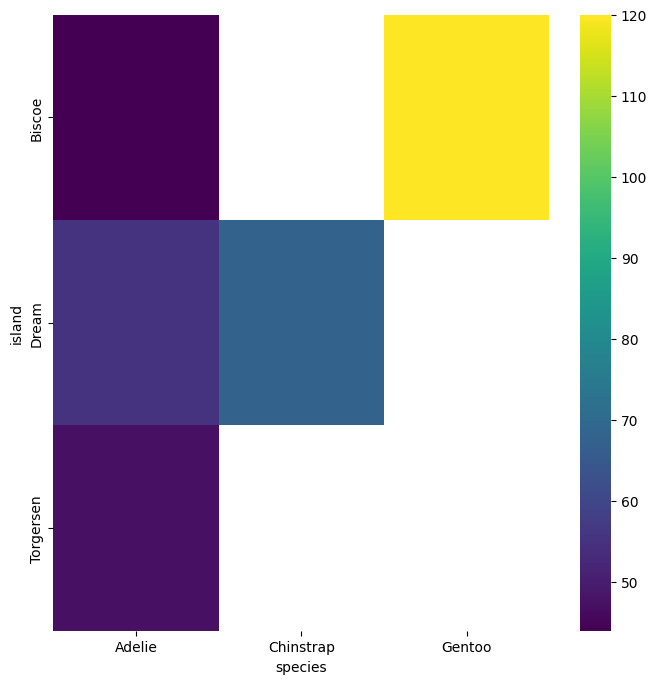

In [ ]:
# @title species vs island

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['island'].value_counts()
    for x_label, grp in df.groupby('species')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('species')
_ = plt.ylabel('island')

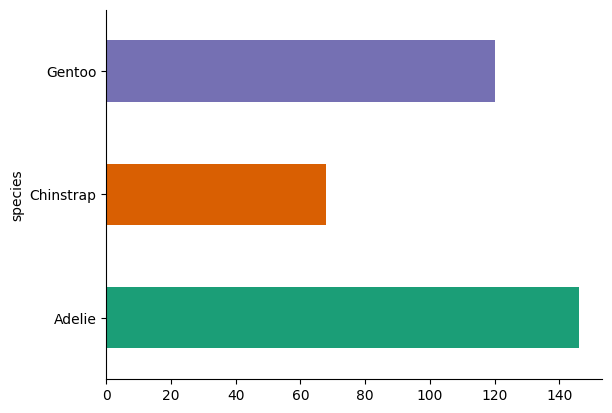

In [ ]:
# @title species

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

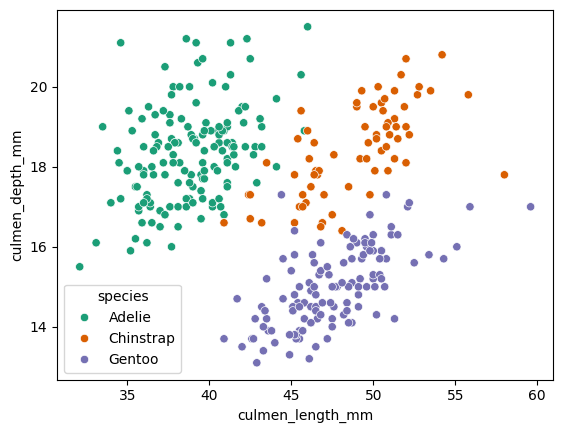

In [ ]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

<ipython-input-29-b1a2536be533>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')


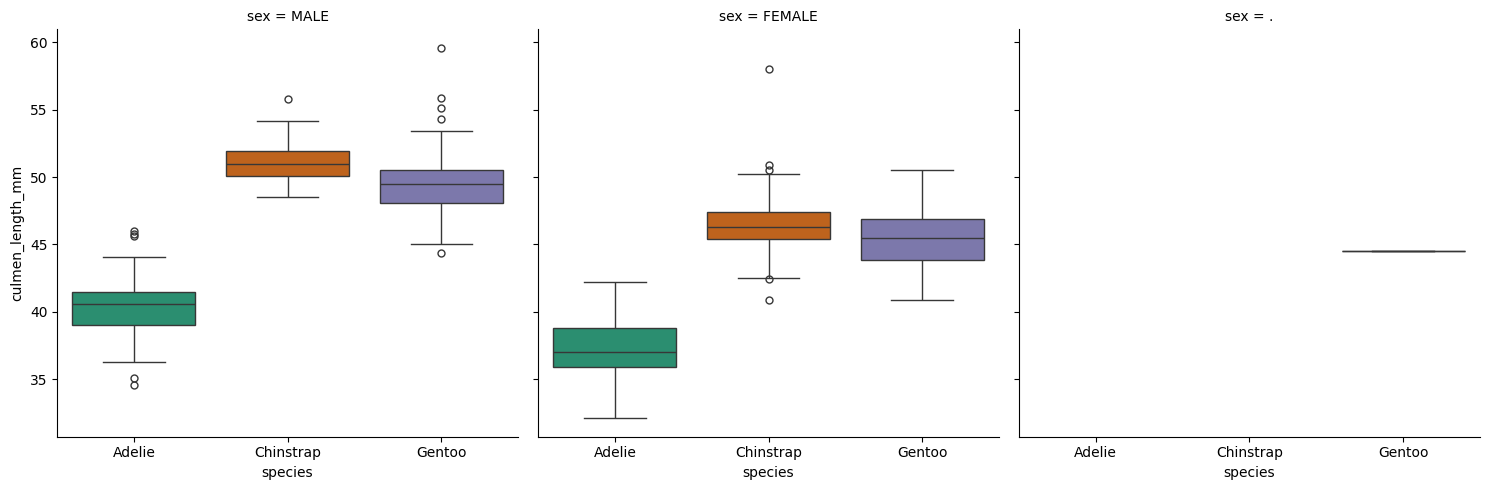

In [ ]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

**Part-3**

**Feature Engineering**

In [ ]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,0,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,0,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,0,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,0,1,0


In [ ]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [ ]:
X.shape

(334, 8)

In [ ]:
y.shape

(334,)

In [ ]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1


In [ ]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [ ]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

**Part - 4**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

**Part 5**

**Decision Tree with entropy**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')


In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

**Visualize the tree**

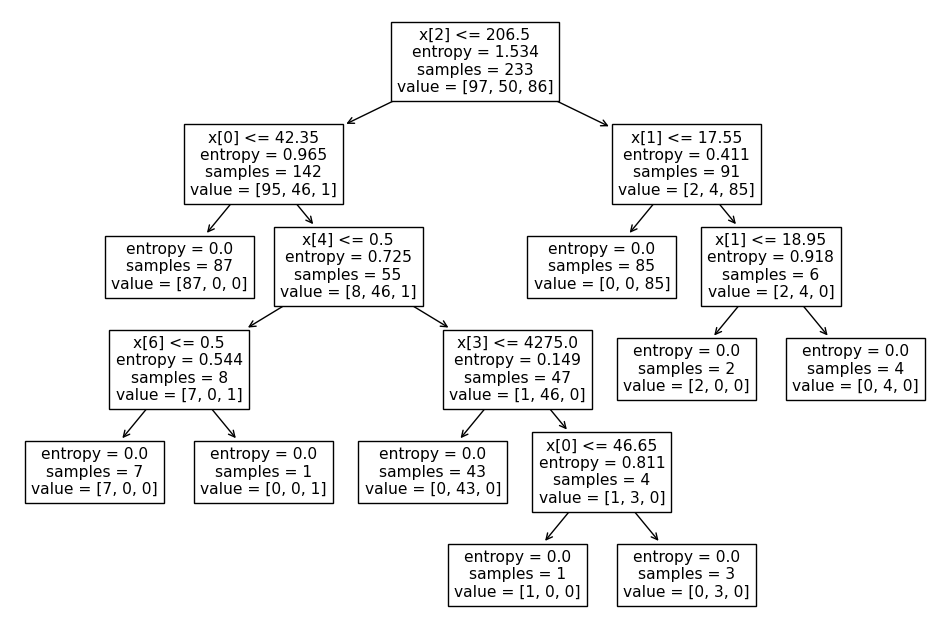

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model);

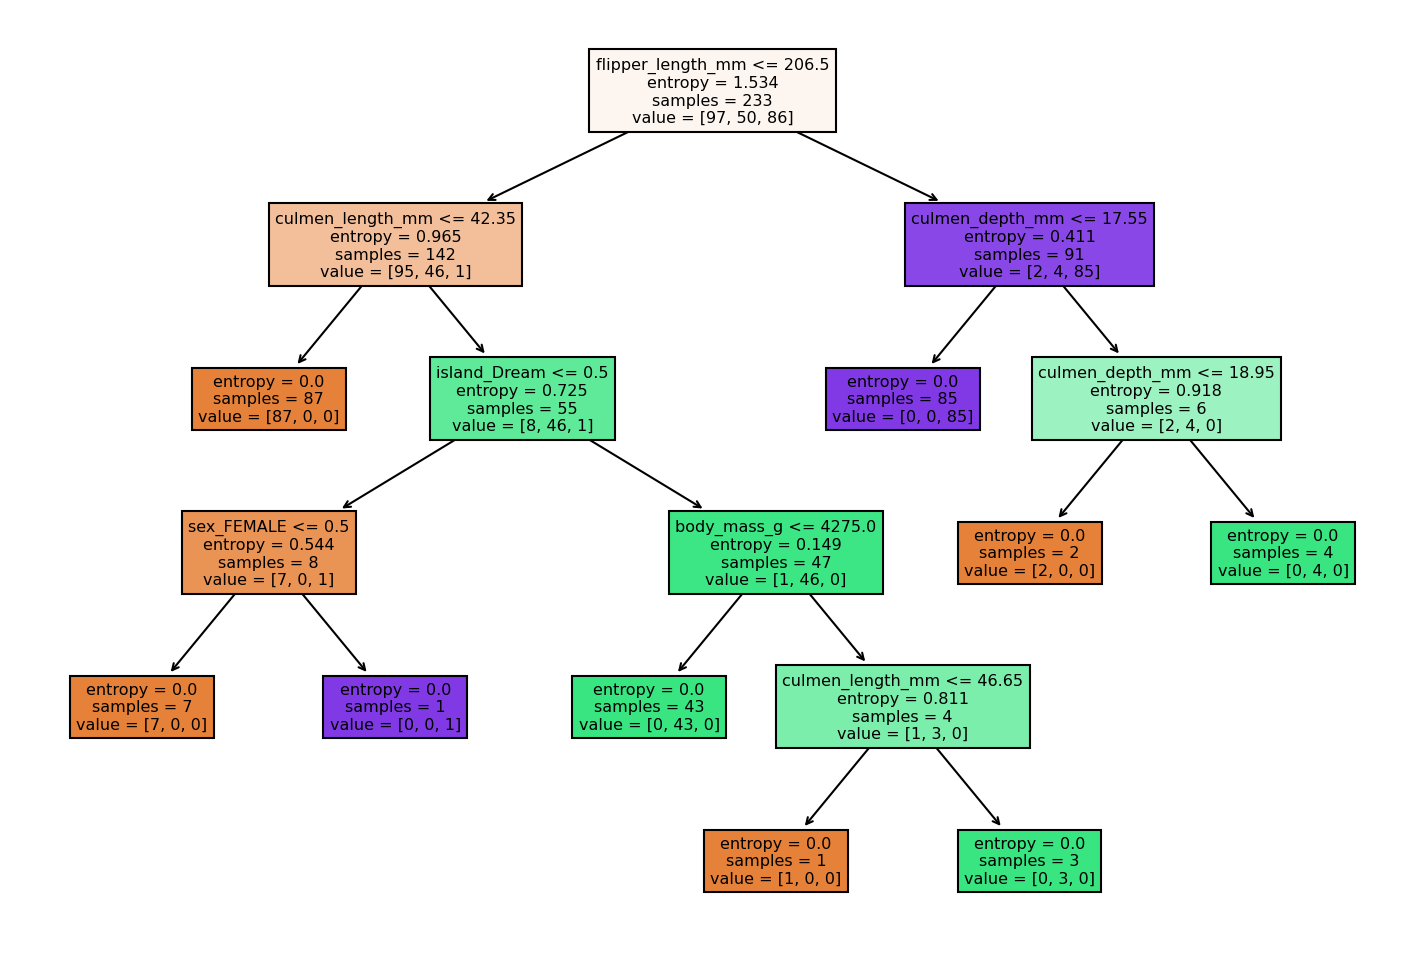

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

**Part - 6**

**Prediction of test**

In [ ]:
base_pred = model.predict(X_test)

**Evaluation**




In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test,base_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

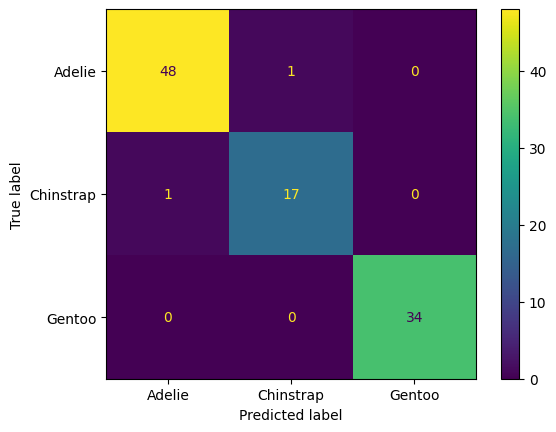

In [ ]:
disp.plot()

In [ ]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        49
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.98      0.98      0.98       101



In [ ]:
model.feature_importances_

array([0.28098151, 0.10470137, 0.51175746, 0.01045784, 0.07993175,
       0.        , 0.01217007, 0.        ])

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.280982
culmen_depth_mm,0.104701
flipper_length_mm,0.511757
body_mass_g,0.010458
island_Dream,0.079932
island_Torgersen,0.000000
sex_FEMALE,0.012170
sex_MALE,0.000000


<Axes: xlabel='species', ylabel='body_mass_g'>

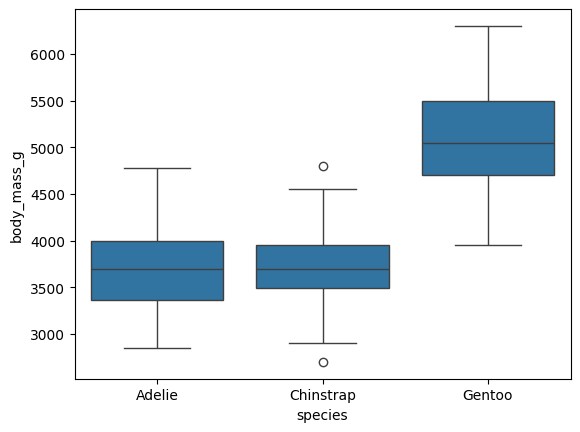

In [ ]:
sns.boxplot(x='species',y='body_mass_g',data=df)

**Part - 7**

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

**Work with hyperparameters**

In [ ]:
pruned_tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.98      0.94      0.96        49
   Chinstrap       0.85      0.94      0.89        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.96       101
   macro avg       0.94      0.96      0.95       101
weighted avg       0.96      0.96      0.96       101





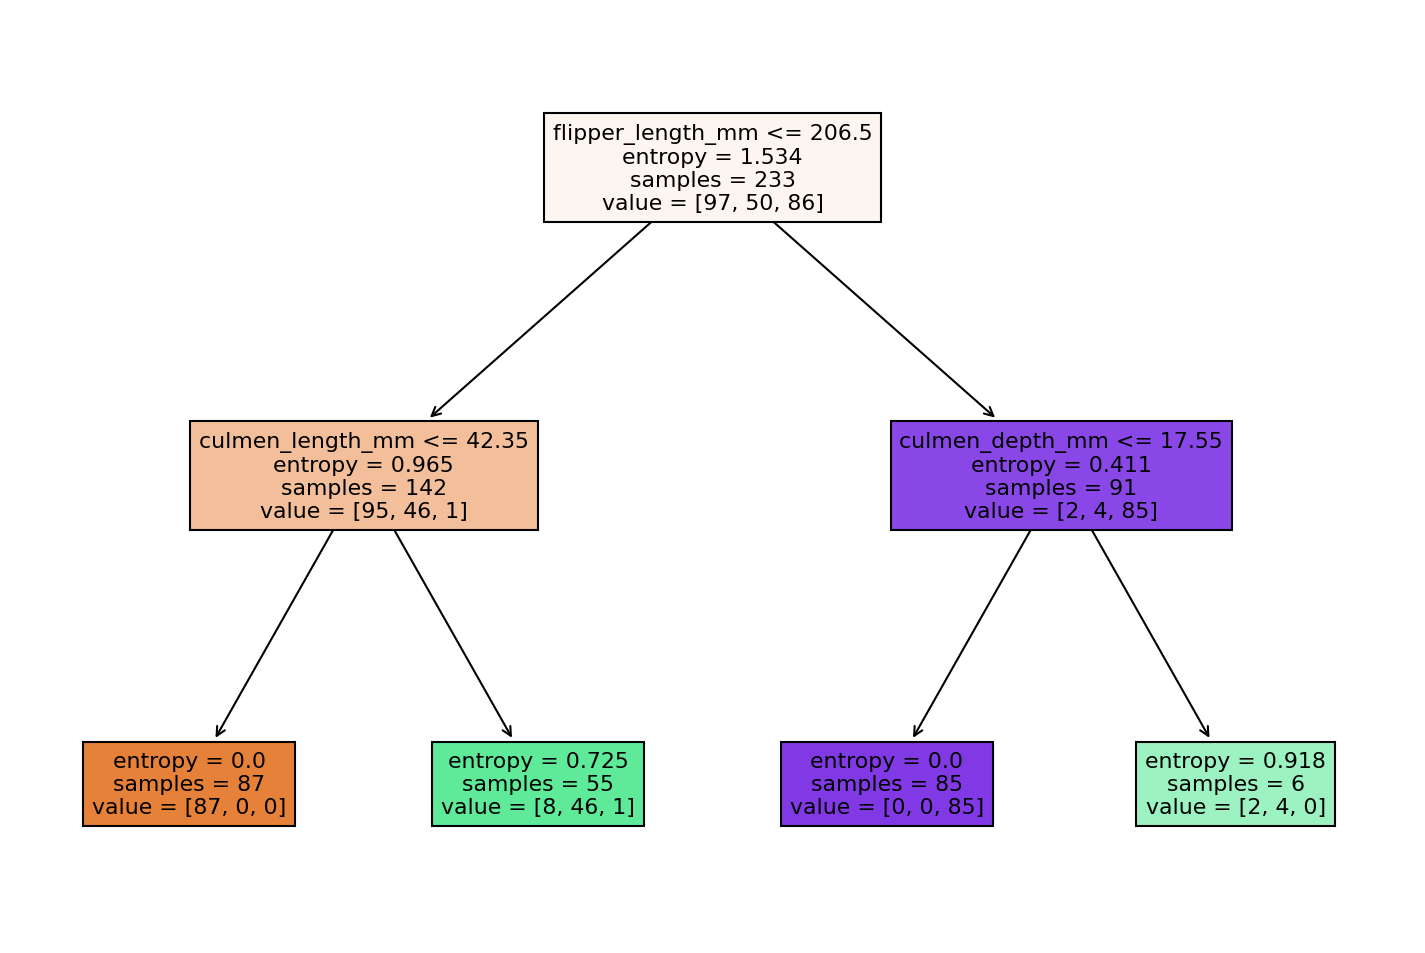

In [ ]:
report_model(pruned_tree)

**Part 8 - Deployment**

**Prediction with unseen data**

In [ ]:
import pickle

# Assuming you already have your trained model 'pruned_tree'
penguin_model = 'decision_tree_model.pkl'  # Choose a filename
pickle.dump(pruned_tree, open(penguin_model, 'wb'))

In [ ]:
import pickle

loaded_model = pickle.load(open('decision_tree_model.pkl', 'rb'))

In [ ]:
row_200 = X.iloc[200]
row_200

culmen_length_mm       42.5
culmen_depth_mm        17.3
flipper_length_mm     187.0
body_mass_g          3350.0
island_Dream            1.0
island_Torgersen        0.0
sex_FEMALE              1.0
sex_MALE                0.0
Name: 206, dtype: float64

In [ ]:
new_data =[[42,17,180,3350,1.0,0.0,1.0,0.0]]
prediction = loaded_model.predict(new_data)
print(prediction)

['Adelie']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
